In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import fastparquet

In [2]:
data_vids = pd.read_parquet('video_stat.parquet', engine = 'fastparquet')

In [3]:
data_vids.head(5)

,video_id,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,973f24c0-15b2-434f-8740-4e2726f79c30,2024-06-15 22:58:03+03:00,0,556,2,0,0,0,0,7.733,...,1.656386,1.616750,0,0,0,1,пережила свой яд,,Мультфильмы,79276150-fdaf-4626-9452-6f1ad975741d
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,2021-04-18 17:27:42+03:00,0,109,2,1,0,0,0,379.000,...,5.570802,5.649635,0,0,0,1,"🎓Знаете ли Вы, что ؟ Интересные факты ! # ...","🎓Знаете ли Вы, что ? Интересные факты ! # 2🎓...",Развлечения,16278647-5912-48af-a071-582dcfd0e354
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,2022-11-17 16:36:43+03:00,0,163,2,2,0,0,0,1020.767,...,0.342614,0.285310,0,0,0,1,"ЗИМНЯЯ, ТЕПЛАЯ ШЛЯПА крючком. Как связать поля...",Шляпа связана из пряжи NAKO Sport Wool в 100гр...,Хобби,9afa94aa-c2a6-43fc-a0d1-175eaf7fa194
3,154fac0e-1794-4406-afa0-61f688e3a764,2010-01-01 00:00:01+03:00,0,10657,5227,1300,202,24,0,42.025,...,0.418336,0.513562,186,1162,4550,1,найк,найк дрессура,Животные,4af9b043-40f4-4288-85c6-192612dca35b
4,470b4e3e-e06d-4370-80dc-34d6a78b22db,2023-11-29 16:49:46+03:00,0,154,45,13,1,0,0,695.647,...,9.310358,9.290497,0,8,18,1,SHACMAN. Шакман замена двухрядного подшипника ...,,Разное,841e6bd8-0015-4502-a3e9-aaa07112a585


In [4]:
data_vids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555687 entries, 0 to 1936085
Data columns (total 43 columns):
 #   Column                                 Non-Null Count    Dtype                    
---  ------                                 --------------    -----                    
 0   video_id                               1555687 non-null  object                   
 1   v_pub_datetime                         1555687 non-null  datetime64[ns, UTC+03:00]
 2   v_total_comments                       1555687 non-null  uint64                   
 3   v_year_views                           1555687 non-null  uint64                   
 4   v_month_views                          1555687 non-null  uint64                   
 5   v_week_views                           1555687 non-null  uint64                   
 6   v_day_views                            1555687 non-null  uint64                   
 7   v_likes                                1555687 non-null  uint64                   
 8   v_disli

In [5]:
data_vids.nunique()

video_id                                 1555687
v_pub_datetime                           1446067
v_total_comments                             947
v_year_views                               36290
v_month_views                              15512
v_week_views                                8879
v_day_views                                 3673
v_likes                                     2983
v_dislikes                                   196
v_duration                                497135
v_cr_click_like_7_days                     20340
v_cr_click_dislike_7_days                   5379
v_cr_click_vtop_7_days                     12392
v_cr_click_long_view_7_days                68222
v_cr_click_comment_7_days                   7446
v_cr_click_like_30_days                    38907
v_cr_click_dislike_30_days                 10288
v_cr_click_vtop_30_days                    26291
v_cr_click_long_view_30_days              126529
v_cr_click_comment_30_days                 15887
v_cr_click_like_1_da

In [32]:
data_view_react = data_vids[['v_total_comments', 'v_year_views', 'v_month_views', 'v_week_views', 'v_day_views', 'v_likes', 'v_dislikes', 'category_id']]
category_comments = data_view_react.groupby('category_id').agg({'v_total_comments' : 'sum', 'v_year_views' : 'sum'})
print(category_popularity.head(5))
category_comments.reset_index(drop=False, names='category', inplace=True)
category_comments.sort_values(by='v_year_views', ascending=False, inplace = True)
category_comments.head(5)

        category  v_total_comments  v_year_views
33  Телепередачи           2510485    1315424901
27   Развлечения            236109     528490046
30       Сериалы             89771     437878810
28        Разное            128290     342165585
22      Обучение            150346     311039792


,category,v_total_comments,v_year_views
33,Телепередачи,2510485,1315424901
27,Развлечения,236109,528490046
30,Сериалы,89771,437878810
28,Разное,128290,342165585
22,Обучение,150346,311039792


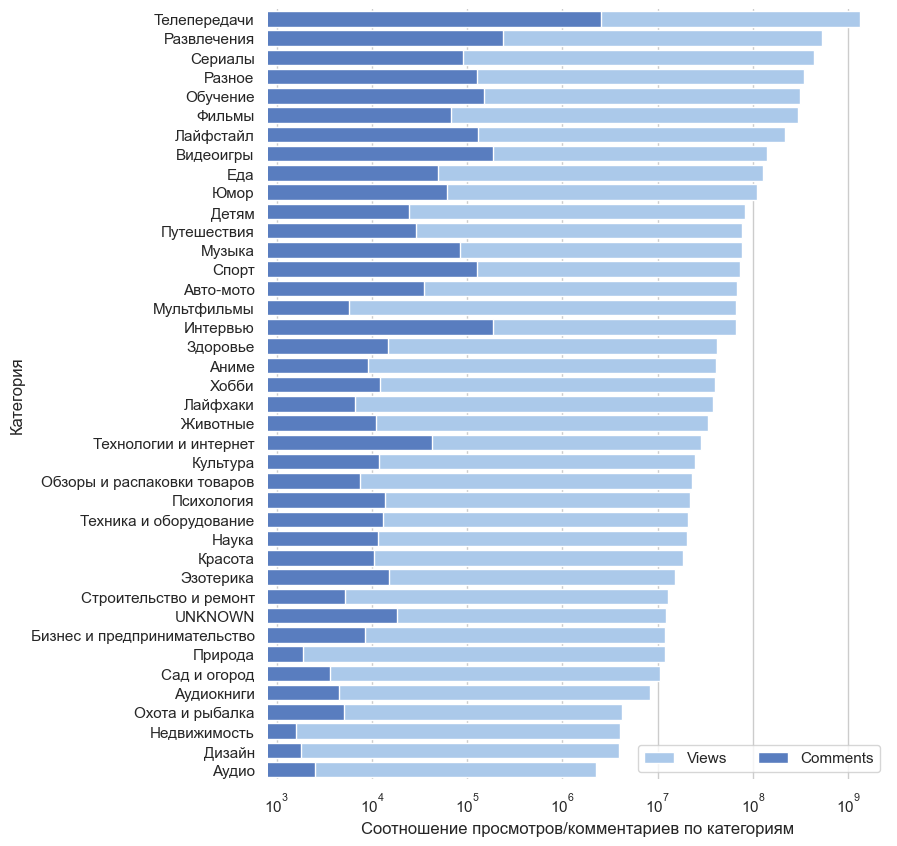

In [33]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x="v_year_views", y="category", data=category_comments,
            label="Views", color="b")

sns.set_color_codes("muted")
sns.barplot(x="v_total_comments", y="category", data=category_comments,
            label="Comments", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xscale = 'log', ylabel="Категория",
       xlabel="Соотношение просмотров/комментариев по категориям")
sns.despine(left=True, bottom=True)

In [34]:
category_likes = data_view_react.groupby('category_id').agg({'v_likes' : 'mean', 'v_year_views' : 'mean'})
print(category_popularity.head(5))
category_likes.reset_index(drop=False, names='category', inplace=True)
category_likes.sort_values(by='v_year_views', ascending=False, inplace = True)
category_likes.head(5)

        category  v_total_comments  v_year_views
33  Телепередачи           2510485    1315424901
27   Развлечения            236109     528490046
30       Сериалы             89771     437878810
28        Разное            128290     342165585
22      Обучение            150346     311039792


,category,v_likes,v_year_views
33,Телепередачи,18.177168,13864.674955
27,Развлечения,25.715182,6847.588670
22,Обучение,14.297069,6421.135260
36,Фильмы,9.658505,4965.527858
30,Сериалы,9.651920,4559.147995


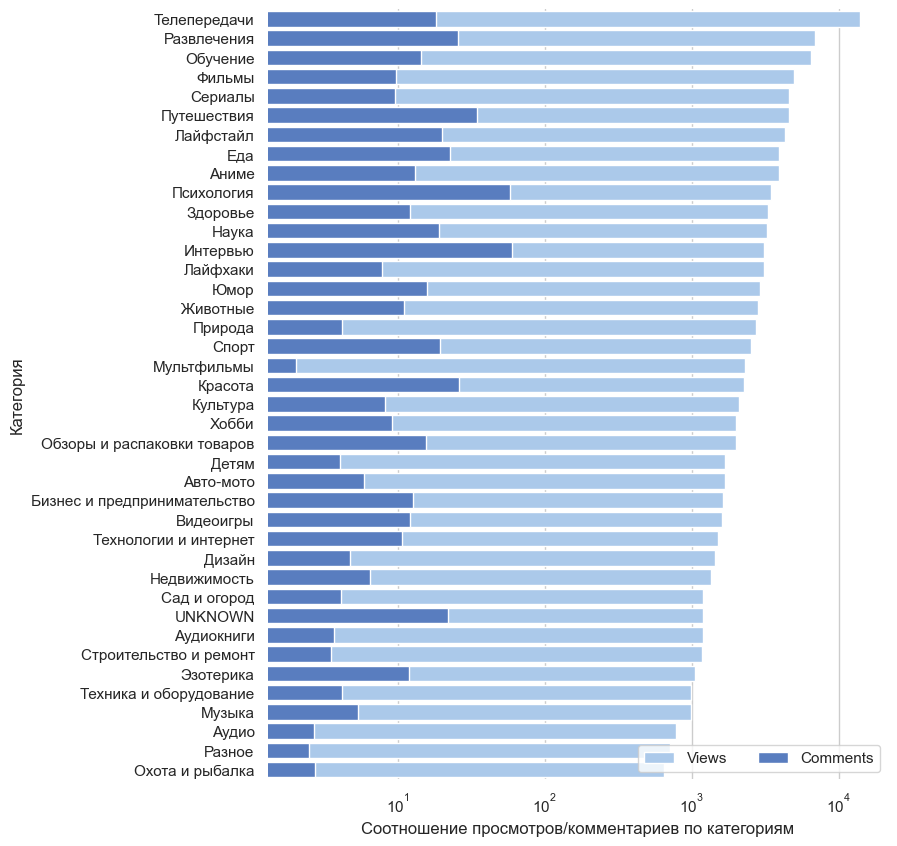

In [35]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x="v_year_views", y="category", data=category_likes,
            label="Views", color="b")

sns.set_color_codes("muted")
sns.barplot(x="v_likes", y="category", data=category_likes,
            label="Comments", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xscale = 'log', ylabel="Категория",
       xlabel="Соотношение просмотров/комментариев по категориям")
sns.despine(left=True, bottom=True)